### Ch.3.1 Perceptron에서 Neural Network로
- 활성화 함수 : 입력 신호의 총합을 출력 신호로 변환하는 함수

### Ch.3.2 Activation function(활성화 함수)
- Step function(계단함수) : 임계값을 경계로 출력이 바뀜 <br>
- Sigmoid function(시그모이드함수) : 신경망에서 주로 쓰임

- 계단 함수 구현하기

In [1]:
def step_function(x):
    if x > 0:
        return 1
    else:
        return 0
    
print(step_function(3.0))

import numpy as np
def step_function(x):
    y = x > 0
    return y.astype(np.int)

print(step_function(np.array([1.0, 2.0])))

1
[1 1]


In [2]:
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [3]:
y = x > 0
y

array([False,  True,  True])

In [4]:
y = y.astype(np.int)
y

array([0, 1, 1])

In [5]:
import matplotlib.pylab as plt

def step_function(x):
    return np.array(x > 0, dtype = np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

<Figure size 640x480 with 1 Axes>

- 시그모이드 함수 구현하기

In [6]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

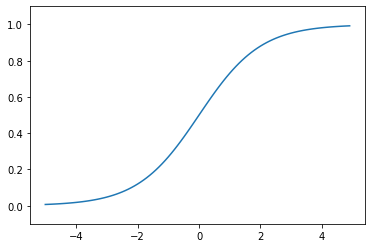

In [7]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

- Non-Linear function : 신경망에서는 활성화 함수로 비선형 함수를 사용 (Step & Sigmoid도 Non-Linear function에 속함)

- ReLU function(Rectified Linear Unit)

In [8]:
def relu(x):
    return np.maximum(0, x)

relu(-2.0)

0.0

### Ch3.3 다차원 배열의 계산

In [9]:
### 1차원 배열
A = np.array([1, 2, 3, 4])

print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [10]:
### 2차원 배열
B = np.array([[1,2],[3,4],[5,6]])

print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


- 행렬의 내적(행렬 곱)

In [11]:
A = np.array([[1,2],[3,4]])
print(A.shape)

B = np.array([[5,6],[7,8]])
print(B.shape)

np.dot(A, B)

(2, 2)
(2, 2)


array([[19, 22],
       [43, 50]])

In [12]:
A = np.array([[1,2,3],[4,5,6]])
print(A.shape)

B = np.array([[1,2],[3,4],[5,6]])
print(B.shape)

np.dot(A, B)

(2, 3)
(3, 2)


array([[22, 28],
       [49, 64]])

In [13]:
### 행렬의 형상(shape) 주의할 것!!!
C = np.array([[1,2],[3,4]])
print(C.shape)
print(A.shape)

np.dot(A, C)

(2, 2)
(2, 3)


ValueError: shapes (2,3) and (2,2) not aligned: 3 (dim 1) != 2 (dim 0)

In [14]:
A = np.array([[1,2],[3,4],[5,6]])
print(A.shape)

B = np.array([7,8])
print(B.shape)

np.dot(A, B)

(3, 2)
(2,)


array([23, 53, 83])

- 신경망의 내적

In [15]:
A = np.array([1,2])
print(A.shape)

W = np.array([[1,3,5],[2,4,6]])
print(B.shape)

y = np.dot(A, W)
y

(2,)
(2,)


array([ 5, 11, 17])

### Ch.3.4 3층 신경망 구현하기

In [16]:
### 입력층에서 1층으로 신호 전달
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(X.shape)
print(W1.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1

(2,)
(2, 3)
(3,)


In [17]:
### 입력층에서 1층으로의 신호 전달
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [18]:
### 1층에서2층으로의 신호 전달
W2 = np.array([[0.1, 0.4],[0.2, 0.5],[0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


In [19]:
### 2층에서 출력층으로의 신호 전달
def identity_function(x):
    return x

W3 = np.array([[0.1, 0.3],[0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identity_function(A3)

- 구현 정리

In [20]:
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4],[0.2, 0.5],[0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3],[0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network


def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    
    return y


network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[0.31682708 0.69627909]


### Ch.3.5 출력층 설계하기
- Identity function(항등 함수)와 Sofrmax function(소프트맥스 함수) 구현하기

In [21]:
### Softmax function 구현
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)
sum_exp_a = np.sum(exp_a)
print(sum_exp_a)
y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [22]:
def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

softmax(a)

array([0.01821127, 0.24519181, 0.73659691])

- Softmax function 구현 시 주의점 : Overflow 문제

In [23]:
a = np.array([1010, 1000, 990])
print(np.exp(a) / np.sum(np.exp(a)))

c = np.max(a)
print(a - c)

np.exp(a - c) / np.sum(np.exp(a - c))

[nan nan nan]
[  0 -10 -20]


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

In [24]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

softmax(a)

array([9.99954600e-01, 4.53978686e-05, 2.06106005e-09])

- Softmax function의 특징

In [25]:
### Softmax function의 출력 총합은 1
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
np.sum(y)

[0.01821127 0.24519181 0.73659691]


1.0

### Ch.3.6 손글씨 숫자 인식
- MNIST 데이터셋

In [26]:
import sys, os
# sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten = True, normalize = False)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
(60000, 784)
(60000,)
(10000, 784)
(10000,)


- MNIST image (mnist_show.py)

In [27]:
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()
    
(x_train, t_train), (x_test, t_test) = load_mnist(flatten = True, normalize = False)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)  # 원래 이미지의 모양으로 변형
print(img.shape)

img_show(img)

5
(784,)
(28, 28)


- 신경망의 추론 처리 (neuralnet_mnist.py)

In [28]:
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize = True, flatten = True, one_hot_label = False)
    return x_test, t_test

def init_network():
    with open('./dataset/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)       
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y


# 정확도(분류가 얼마나 올바른가) 평가
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)  # 확률이 가장 높은 원소의 인덱스를 얻는다.
    if p == t[i]:
        accuracy_cnt += 1
        
print("Accuracy: " + str(float(accuracy_cnt) / len(x)))

Accuracy: 0.9352


- 배치처리

In [29]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

print(x.shape)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


In [30]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis = 1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])
    
print("Accuracy: " + str(float(accuracy_cnt) / len(x)))

Accuracy: 0.9352
